In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Create a reference to the CSVs and import them to a Pandas DataFrame
csv_path = os.path.join("Resources", "city_data.csv")
citydata = pd.read_csv(csv_path)
csv_path2 = os.path.join("Resources", "ride_data.csv") 
ridedata = pd.read_csv(csv_path2, index_col="ride_id")

In [3]:
#Remove duplicate row(s) (Port James)
driver_count = pd.DataFrame(citydata.groupby(['city'])['driver_count'].max())

In [4]:
#Find total rides per city
total_rides = ridedata["city"].value_counts()
total_rides = pd.DataFrame(total_rides)
total_rides = total_rides.rename(columns ={"city":"total_rides"})

In [5]:
#merge to a single dataset
pyberdata = driver_count.merge(total_rides, how='outer', left_index=True, right_index=True)

In [6]:
#delete dupe city to get type
citydata = pd.read_csv(csv_path, index_col="city") #126 rows
citydata = citydata.drop(['driver_count'], axis=1)
citydata = pd.DataFrame(citydata.groupby(['city'])['type'].max())

In [7]:
#merge to a single dataset
pyberdata = pyberdata.merge(citydata, how='outer', left_index=True, right_index=True)

In [8]:
total_fare = pd.DataFrame(ridedata.groupby(['city'])['fare'].sum())
total_fare = total_fare.rename(columns ={"fare":"total_fares"})

In [9]:
#merge to a single dataset
pyberdata = pyberdata.merge(total_fare, how='outer', left_index=True, right_index=True)

In [10]:
#calculate average; branch two datasets for different visualizations
pyberdata["average_fare"] = pyberdata["total_fares"] / pyberdata["total_rides"]
pybercities = pyberdata
pyberdata = pyberdata.drop(['average_fare'], axis=1)
pybercities = pybercities.drop(['total_fares'], axis=1)

In [11]:
#set format for pie charts
typefares = pd.DataFrame(pyberdata.groupby(['type'])['total_fares'].sum())
typedrivers = pd.DataFrame(pyberdata.groupby(['type'])['driver_count'].sum())
typerides = pd.DataFrame(pyberdata.groupby(['type'])['total_rides'].sum())
pybertypes = typefares.merge(typedrivers, how='outer', left_index=True, right_index=True)
pybertypes = pybertypes.merge(typerides, how='outer', left_index=True, right_index=True)

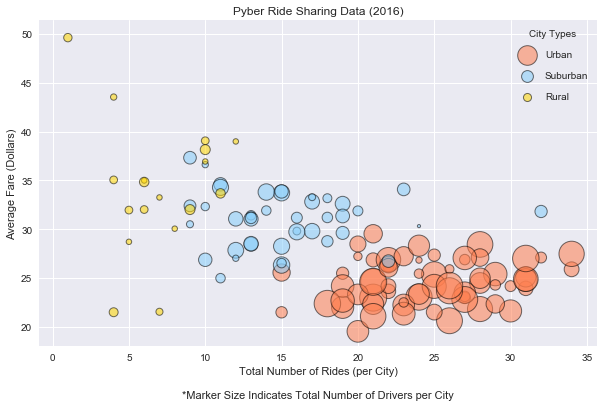

In [12]:
urban = pybercities[(pybercities.type == "Urban")]
suburban = pybercities[(pybercities.type == "Suburban")]
rural = pybercities[(pybercities.type == "Rural")]

plt.figure(figsize=(10,6))
plt.style.use('seaborn')
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)\n\n*Marker Size Indicates Total Number of Drivers per City")
plt.ylabel("Average Fare (Dollars)")

plt.scatter(urban.total_rides, urban.average_fare, s=(urban["driver_count"])*10, alpha=.55,
            c="coral", label="Urban", edgecolors="black", linewidth=1)
plt.scatter(suburban.total_rides, suburban.average_fare, s=(suburban["driver_count"])*10, alpha=.55,
            c="lightskyblue", label="Suburban", edgecolors="black", linewidth=1)
plt.scatter(rural.total_rides, rural.average_fare, s=(rural["driver_count"])*10, alpha=.55,
            c="gold", label="Rural", edgecolors="black", linewidth=1)

plt.legend(labelspacing=1.2, loc='best', title="City Types")

plt.show()

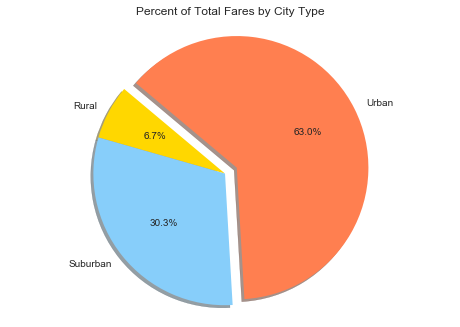

In [13]:
plt.title("Percent of Total Fares by City Type")
labels=["Rural","Suburban","Urban"]
colors=["gold","lightskyblue","coral"]
explode=[0,0,0.1]
sizes = pybertypes['total_fares'].values.tolist()
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

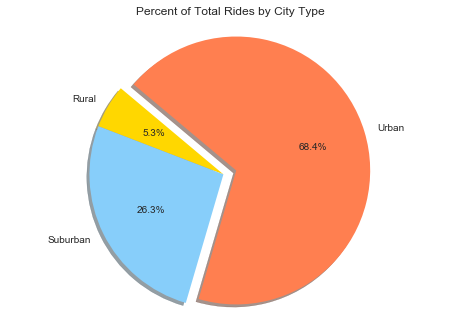

In [14]:
plt.title("Percent of Total Rides by City Type")
sizes = pybertypes['total_rides'].values.tolist()
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

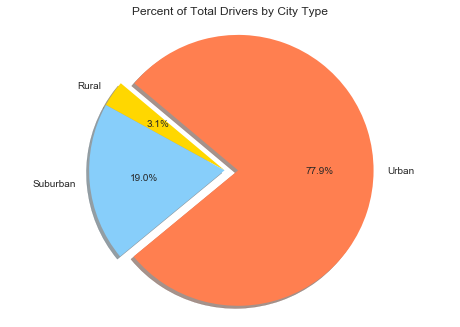

In [15]:
plt.title("Percent of Total Drivers by City Type")
sizes = pybertypes['driver_count'].values.tolist()
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()